# Assessing Seasonal Drivers of Kelp Canopy Cover Along the West Coast

## Introduction

Bull kelp, *Nereocystis luetkeana*, is one of the primary canopy-forming kelp species on the west coast, ranging from Point Conception, California to Unimak Island, Alaska. In 2013, a "perfect storm" of events led to an over 90% decrease of bull kelp in Northern California, with similar losses across the entire species range (Rogers-Bennett & Catton, 2019; Weigel et al., 2023). This decline was attributed to several factors, starting with the onset of sea star wasting disease (SSWD) in 2013. SSWD affected over 20 species of sea star, most notably the sunflower star, *Pycnopodia helianthoides*, whose population declined by 80-100% depending on location (Harvell et al., 2019). This epidemic was followed by a marine heatwave nicknamed “The Blob” which persisted from 2014-2017. This heatwave was the most intense and persistent event observed to date (Aref-Dalmau et al., 2019). Anomalous sea surface temperatures (SST) were 1°C warmer than extremes reported in previous El Ninos, with the highest maximum temperature reaching 5.9°C above average (Aref-Dalmau et al., 2019). The combination of SSWD and this marine heatwave triggered a regime-shift from kelp forest to urchin barren in 2015 (Filbee-Dexter & Scheibling, 2014; McPherson et al. 2021; Rogers-Bennett & Catton, 2019). Without their sunflower star predator, sea urchin populations increased 60-fold, devastating kelp populations (Rogers-Bennett & Catton, 2019). In many areas kelp forests are still struggling to recover to a baseline state.

While bull kelp faced both biotic and abiotic stressors before 2013, it has historically been resilient to fluctuations such as extreme temperatures during previous El Ninos. The widespread collapse underscores the need for a more comprehensive understanding of how environmental factors impact bull kelp throughout its life cycle. Bull kelp has an annual heteromorphic life cycle, alternating between a macroscopic sporophyte and a microscopic gametophyte stage every year. Adult sporophytes become reproductive in late spring and summer, with some able to overwinter and continue reproducing through fall and winter (Ulaski & Konar, 2021; Weigel et al., 2023). Sporophytes reproduce by releasing microscopic zoospores which settle on rocky substrate and germinate into male and female gametophytes. These gametophytes undergo sexual reproduction during winter, producing juvenile sporophytes that begin growing in early spring.

It is well known that the adult sporophyte stage requires ample light, high nutrients, and cold temperatures for successful growth (Springer et al., 2010). Early life history stages of bull kelp have a maximum thermal tolerance of around 18-20°C , and grow best between 10-16°C (Garcia-Reyes et al., 2022; Weigel et al., 2023). Not much else is known about gametophyte and juvenile sporophyte sensitivity to stressors, including the low end of their thermal tolerance. Winter oceanographic conditions, often overlooked in studies of biophysical interactions, could be critical in determining the health of the microscopic stages of bull kelp, and thus the adult sporophyte stage the following summer and fall (Garcia-Reyes et al., 2022). Garcia-Reyes et al. (2022) investigated whether winter oceanographic conditions could predict summer bull kelp canopy cover in Northern California. Using the Multivariate Ocean Climate Indicator (MOCI) which synthesizes factors such as upwelling, sea level, wind, SST, and regional climate indices, their results showed that winter conditions were a good predictor for summer bull kelp canopy cover *before* the onset of stressors in 2013 (Garcia-Reyes et al., 2022). After 2013 it is likely biotic factors such as urchin grazing that limit kelp recovery. This study represents a significant step towards understanding how seasonal drivers can help predict trends in kelp populations.

Given the extensive loss of bull kelp, monitoring large spatial and temporal changes is challenging. However, the use of satellite imagery has become a powerful tool to generate this data on multi-decadal scales (Bell et al., 2020; Saccomanno et al., 2023). Floating kelp canopy area can be quantified with high spatial resolution (~30m) multispectral sensors from Landsat satellites (Bell et al., 2020; Cavanaugh et al., 2011). Using imagery from these satellites, kelp canopy area is estimated through a classification scheme that defines pixels as kelp, land, seawater, and cloud/NaN (Bell et al., 2020). Satellite sensors can also measure oceanographic conditions such as SST, sea surface height (SSH), sea surface salinity (SSS), and chlorophyll *a* concentrations. These resources provide a reliable way to analyze kelp populations and oceanographic conditons dating back to the 1980's. 

In a previous project I used kelp canopy area, SST, and chlorophyll *a* data measured from satellites to determine if average winter SST and chlorophyll *a* were good predictors for fall kelp canopy cover on the Sonoma coast in Northern California. Late summer/early fall is the peak biomass season of bull kelp, and can be used as a proxy for the health of the species. Using a correlation, I found that average winter SST was the best predictor for fall kelp canopy area prior to 2013 (R$^2$ = 0.787). Chlorophyll *a* alone was not a good predictor for canopy area (R$^2$ = 0.172). This previous analysis and the Garcia Reyes et al. paper only investigated these trends in Northern California, and I am interested to see how these results compare in the northern range of bull kelp. 

For this project I have expanded my study region to include two sites in Northern California, two sites in Oregon, and two sites in Washington (Figure 1). No sites were selected in Alaska because consistent cloud cover makes the kelp canopy estimates unreliable. I am interested in investigating: 1) If average winter SST is a good predictor for fall kelp canopy cover at sites all across the species range, and 2) How the correlation between winter SST and fall kelp canopy compare *before* and *after* the onset of stressors in 2013. I predict that as average winter SST increases, fall kelp canopy cover will decrease at all sites, resulting in a negetive correlation. I also predict this trend will only be apparent and significant prior to the onset of stressors, and that years after the onset of stressors will have insignficant correlations. Sites in the same state will likely be more closely correlated to each other than sites a farther distance away.

Understanding how seasonal factors influence bull kelp populations at all stages of their lifecycle, and across their entire range, is critical if we want to predict how populations might respond to future changes in climate. Little is known about how the microscopic lifestages respond to stressors, but their health can predict the success of the following generation. If we knew the importance of winter conditions on the microscopic stages of bull kelp, it is possible we could have predicted the widespread collapse in 2013. As of now, these trends have only been analyzed in Northern Calfornia. However, bull kelp populations in the northern range could respond differently to winter conditions. If we want to accurately understand the factors driving bull kelp loss and persistence, we need more data on how seasonal oceanographic conditions influence bull kelp in other regions.


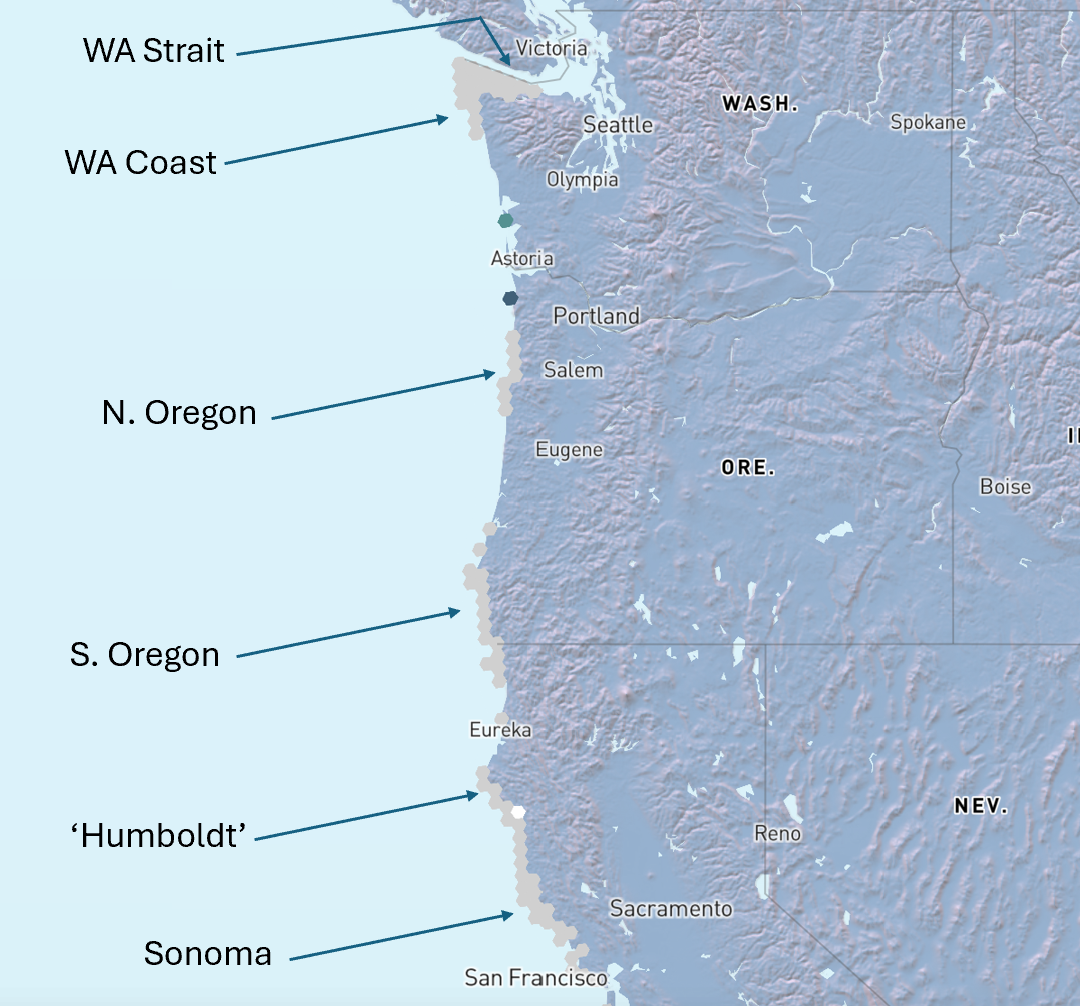

**Figure 1)** Graphic of the six sites used for this project. From South to North: Sonoma, Humboldt, Southern Oregon, Northern Oregon, Washington Coast, and Washington Strait.

## Methods

### Import necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os
import requests
import argparse
import datetime as dt
import pandas as pd
import statsmodels.api as sm
from scipy.interpolate import interp1d
import datetime as dt
from scipy import stats
from scipy import linalg
import statsmodels.formula.api as smf

C:\Users\maddi\AppData\Local\Temp\ipykernel_21812\3663235364.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


***Kelp canopy data***

A large, easily accessible historical dataset of kelp canopy cover is available through kelpwatch.org, a collaboration between The Nature Conservancy, UCLA, WHOI, NASA, and UCSB. Researchers at these institutions have calculated historical kelp canopy area using satellite imagery spanning from Alaska to Mexico, from 1984 to present. Kelp canopy area is derived from multispectral imagery collected by Landsat sensors. Using a classification scheme developed by Bell et al. (2020), pixels in the images are categorized as kelp, land, seawater, or cloud/NaN. The fraction of kelp in a pixel, multiplied by the pixel area, provides an estimated kelp canopy area (Bell et al., 2020). 

The platform allows users to define a region and download kelp canopy area for that site. For this study I had 6 sites - 2 in California, 2 in Oregon, and 2 in Washington. The min and max latitude (Y) and longitude (X) coordinates I used for each site are:

|       |  Sonoma   | Humboldt  | S. Oregon | N. Oregon | WA Coast  | WA Strait  |
| ----- | -------   | --------- |-----------|-----------|---------- |----------- |
| Min X |-123.791790|-124.504527|-124.814194|-124.663775|-124.944673| -124.752394|
| Max X |-123.128838|-123.841601|-124.283627|-124.390232|-124.557004| -123.569373|
| Min Y |38.412054  |39.802880  |42.007475  |44.607492  |47.828107  |48.150009   |
| Max Y |38.952958  | 40.439954 | 42.862386 |45.535849  | 48.390470 |48.498808   |

**Table 1)** Min and max latitude (Y) and longitude (X) coordinates for each site

These areas were defined for each site, and then all data was downloaded as a .csv file. 

### Import kelp canopy data for all 6 sites

In [2]:
#CSV of kelp canopy in Norcal- Humbolt coast
filename1 = os.path.join('data/Kelp_area/Humboldt_kelp.csv')
Humboldt_df = pd.read_csv(filename1, index_col=False)

#CSV of kelp canopy in Norcal - Sonoma coast
filename2 = os.path.join('data/Kelp_area/Sonoma_kelp.csv')
Sonoma_df = pd.read_csv(filename2, index_col=False)

#CSV of kelp canopy in Southern Oregon
filename3 = os.path.join('data/Kelp_area/So_Oregon_kelp.csv')
So_Oregon_df = pd.read_csv(filename3, index_col=False)

#CSV of kelp canopy in Northern Oregon
filename4 = os.path.join('data/Kelp_area/No_Oregon_kelp.csv')
No_Oregon_df = pd.read_csv(filename4, index_col=False)

#CSV of kelp canopy on Washington Coast
filename5 = os.path.join('data/Kelp_area/No_Washington_Coast_kelp.csv')
Coast_WA_df = pd.read_csv(filename5, index_col=False)

#CSV of kelp canopy on Washington Strait
filename6 = os.path.join('data/Kelp_area/No_Washington_Strait_kelp.csv')
Strait_WA_df = pd.read_csv(filename6, index_col=False)


***Kelp canopy data continued***

Kelp area on kelpwatch.org is averaged into four seasonal quarters: quarter one (January-March), quarter two (April-June), quarter three (July-September), and quarter four (October-December). For this project I am only interested in kelp canopy area during the peak biomass season of bull kelp, so I subsetted the dataframe to only include quarter three data. Although data is available back to 1984, I could only access SST starting from 2002, which determined the range of this study. Because of this I also subsetted the dataframe to only include kelp data from 2003-present. 

### Subset kelp canopy data to only include quarter three data from 2003-present

In [3]:
WA_coast_Q3 = Coast_WA_df[(Coast_WA_df['quarter'] == 3) & (Coast_WA_df['year']>2002)]
WA_strait_Q3 = Strait_WA_df[(Strait_WA_df['quarter'] == 3) & (Strait_WA_df['year']>2002)]
OR_N_Q3 = No_Oregon_df[(No_Oregon_df['quarter'] == 3) & (No_Oregon_df['year']>2002)]
OR_S_Q3 = So_Oregon_df[(So_Oregon_df['quarter'] == 3) & (So_Oregon_df['year']>2002)]
Humboldt_Q3 = Humboldt_df[(Humboldt_df['quarter'] == 3) & (Humboldt_df['year']>2002)]
Sonoma_Q3 = Sonoma_df[(Sonoma_df['quarter'] == 3) & (Sonoma_df['year']>2002)]

***Sea surface temperature data***

I downloaded SST measurements from the Physical Oceanography Distributed Active Archive Center (PODAAC). The code for doing so can be found in the 'SST_download' notebook. Sea surface temperature on this site is gathered from satellite imagery, which estimates the surface temperature of the water from the electromagnetic radiation emitted from the ocean.

I downloaded this data from November 2002-present. Once all of the data was downloaded, I created a grid defining each site using the coordinates listed in Table 1. For each defined site, I averaged the winter sea surface temperatures from December 1st to February 28th. For example, December 2002-February 2003 SST's were averaged and used to predict Fall 2003 kelp canopy area. These annual winter averages for each site were exported as a .csv to use in this notebook. The code for defining sites and averaging winter SST can be found in the 'SST_download' notebook.

### Import SST data for all 6 sites

In [4]:
#CSV of average winter SST in Humboldt
filename7 = os.path.join('data/Site_SST/sst_humboldt_final_timeseries.csv')
Humboldt_sst = pd.read_csv(filename7, index_col=False)

#CSV of average winter SST in Sonoma
filename8 = os.path.join('data/Site_SST/sst_sonoma_final_timeseries.csv')
Sonoma_sst = pd.read_csv(filename8, index_col=False)

#CSV of average winter SST in Southern Oregon
filename9 = os.path.join('data/Site_SST/sst_s_oregon_final_timeseries.csv')
OR_S_sst = pd.read_csv(filename9, index_col=False)

#CSV of average winter SST in Northern Oregon
filename10 = os.path.join('data/Site_SST/sst_n_oregon_final_timeseries.csv')
OR_N_sst = pd.read_csv(filename10, index_col=False)

#CSV of average winter SST on Washington Coast
filename11 = os.path.join('data/Site_SST/sst_wa_coast_final_timeseries.csv')
WA_coast_sst = pd.read_csv(filename11, index_col=False)

#CSV of average winter SST on Washington Strait
filename12 = os.path.join('data/Site_SST/sst_wa_strait_final_timeseries.csv')
WA_strait_sst = pd.read_csv(filename12, index_col=False)

### Plot raw data for each site

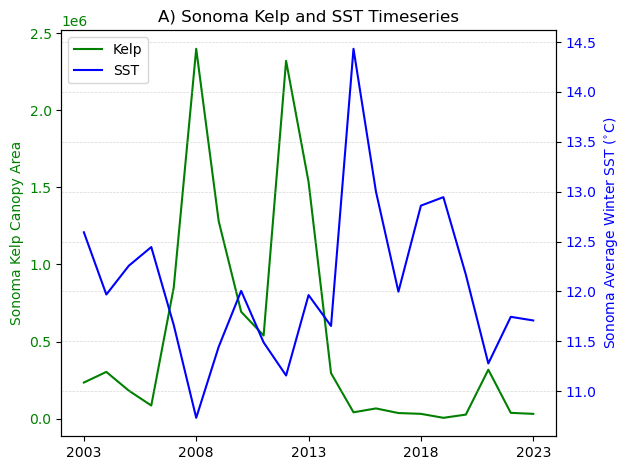

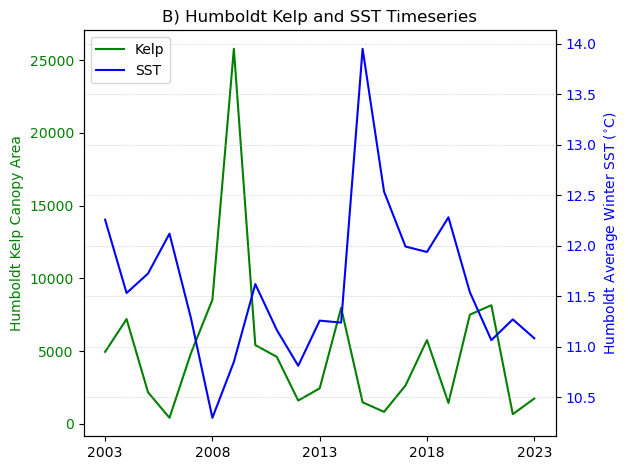

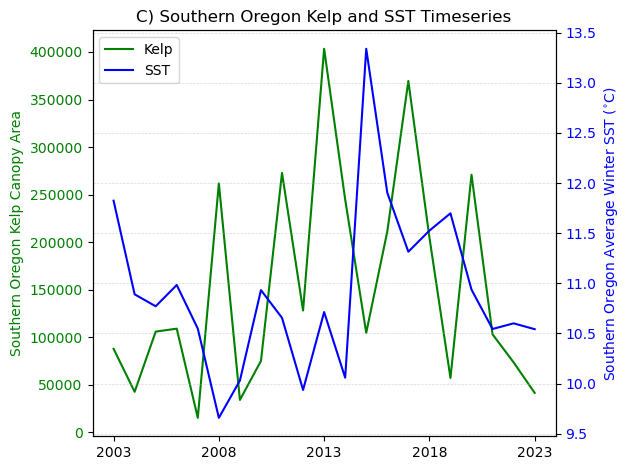

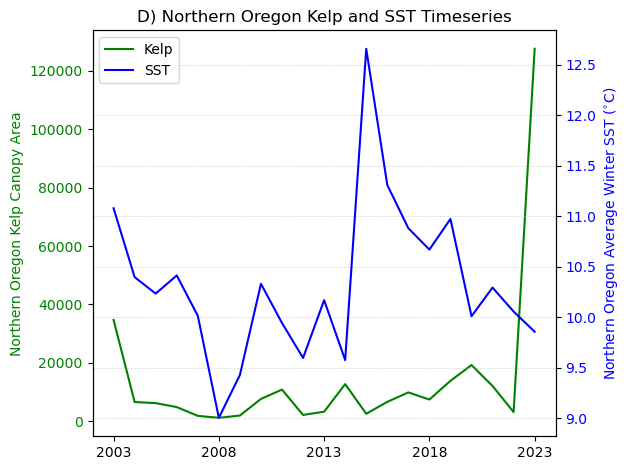

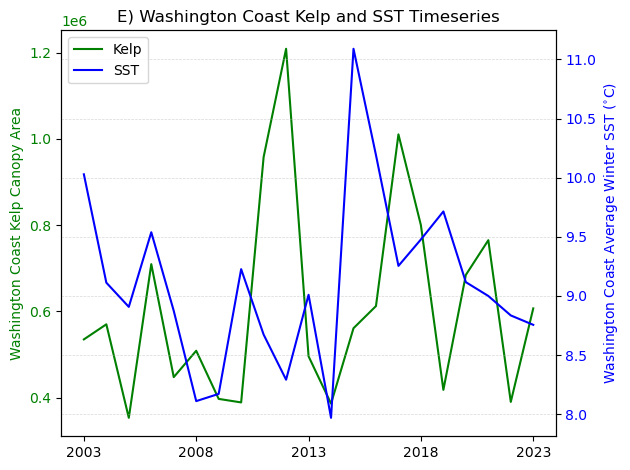

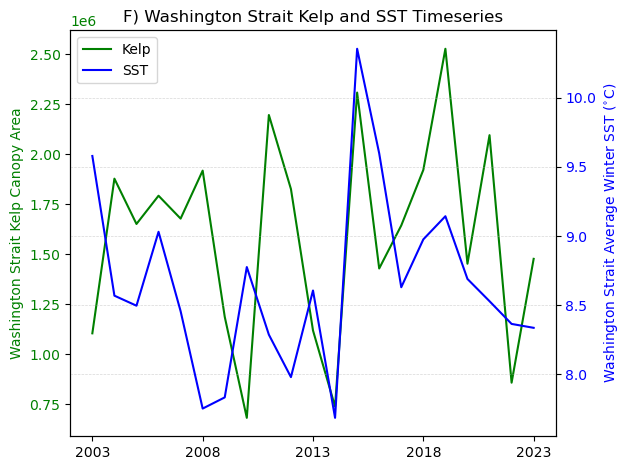

In [5]:
all_data = [[Sonoma_Q3, Sonoma_sst,'Sonoma', 'A) '],[Humboldt_Q3, Humboldt_sst, 'Humboldt', 'B) '], 
            [OR_S_Q3, OR_S_sst, 'Southern Oregon', 'C) '],[OR_N_Q3, OR_N_sst, 'Northern Oregon', 'D) '], 
            [WA_coast_Q3, WA_coast_sst, 'Washington Coast', 'E) '], 
            [WA_strait_Q3, WA_strait_sst, 'Washington Strait', 'F) ']]


for site in all_data:
    
    # Create a figure and axis
    fig, ax1 = plt.subplots()
    
    # Plot the first variable on the first y-axis
    ax1.plot(site[0]['year'], site[0]['kelp_area_m2'], color='green', label='Kelp')
    ax1.set_ylabel(site[2]+' Kelp Canopy Area', color='green')
    ax1.tick_params(axis='y', labelcolor='green')
    
    # Create the second y-axis and plot the second variable
    ax2 = ax1.twinx()
    ax2.plot(site[1]['Year'], site[1]['SST'], color='blue', label='SST')
    ax2.set_ylabel(site[2]+ ' Average Winter SST ($^{\circ}$C)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    
    # Set common labels
    plt.xlabel('Year')
    plt.title(site[3] + site[2] + ' Kelp and SST Timeseries')
    
    # Add a legend to differentiate between the variables
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    
    # Adjust layout
    fig.tight_layout()
    
    plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
    plt.gca().set_xticks(np.arange(2003, 2025, 5))
    plt.show()

**Figure 2)** Timeseries of average winter SST (blue) and average fall kelp canopy cover (green) at all six study sites.

***Correlations***

To asses how average winter SST is related to fall kelp canopy cover, I ran a linear regression for each site during three time periods. The time periods include the entire dataset (2003-2023), years prior to the onset of stressors (2003-2012), and years after the onset of stressors (2013-2023). I initially started by plotting a linear model. However, the model predicted kelp canopy values less than zero which is not ecologically accurate. Instead, I ran the regression on the log of kelp canopy area and plotted an exponential model to more accurately represent the potential kelp decline to zero. 

For each regression I calculated an R$^2$ value, p-value to determine significance, and standard error. Models were plotted over the raw data, and R$^2$ values printed on the graphs. An asterisk was added to display signficant relationships (p-value < 0.05). 

### Compute linear regression of average winter SST vs kelp canopy cover for each site during all years

In [6]:
Sonoma_result = stats.linregress(Sonoma_sst['SST'], np.log(Sonoma_Q3['kelp_area_m2']))

Humboldt_result = stats.linregress(Humboldt_sst['SST'], np.log(Humboldt_Q3['kelp_area_m2']))

OR_S_result = stats.linregress(OR_S_sst['SST'], np.log(OR_S_Q3['kelp_area_m2']))

OR_N_result = stats.linregress(OR_N_sst['SST'], np.log(OR_N_Q3['kelp_area_m2']))

WA_coast_result = stats.linregress(WA_coast_sst['SST'], np.log(WA_coast_Q3['kelp_area_m2']))

WA_strait_result = stats.linregress(WA_strait_sst['SST'], np.log(WA_strait_Q3['kelp_area_m2']))

**Print results** - R^2, p-value, and standard error

In [7]:
site_result = [[Sonoma_result,'Sonoma 2003-2023', 'A)'],[Humboldt_result, 'Humboldt 2003-2023', 'B)'],
               [OR_S_result, 'Southern Oregon 2003-2023', 'C)'], [OR_N_result, 'Northern Oregon 2003-2023', 'D)'],
               [WA_coast_result, 'Washington Coast 2003-2023', 'E)'], [WA_strait_result, 'Washington Strait 2003-2023', 'F)']]

from Models import printing_results

printing_results(site_result)

Sonoma 2003-2023 R^2 = 0.392 p-value = 0.014 Standard error = 0.385
Humboldt 2003-2023 R^2 = 0.197 p-value = 0.262 Standard error = 0.267
Southern Oregon 2003-2023 R^2 = 0.002 p-value = 5.186 Standard error = 0.241
Northern Oregon 2003-2023 R^2 = 0.017 p-value = 3.427 Standard error = 0.318
Washington Coast 2003-2023 R^2 = 0.004 p-value = 4.704 Standard error = 0.108
Washington Strait 2003-2023 R^2 = 0.061 p-value = 1.673 Standard error = 0.125


**Plot results for all years**

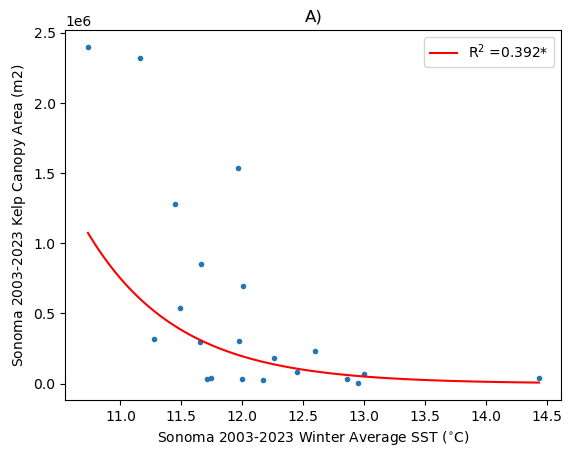

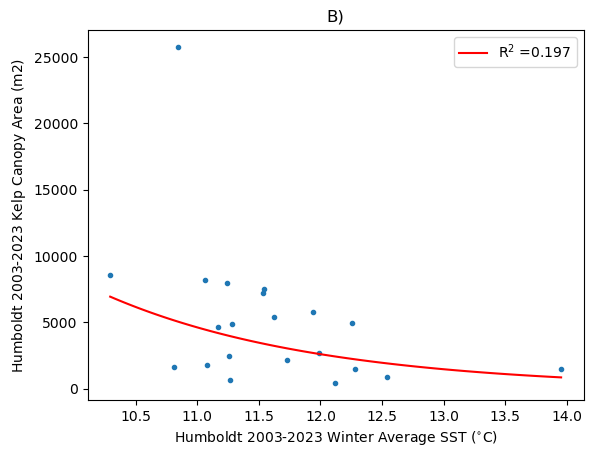

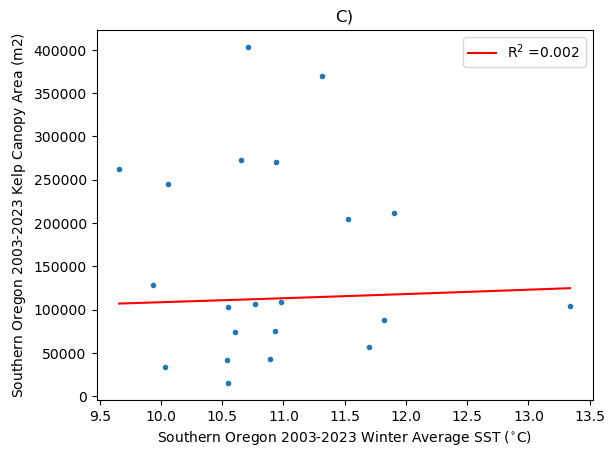

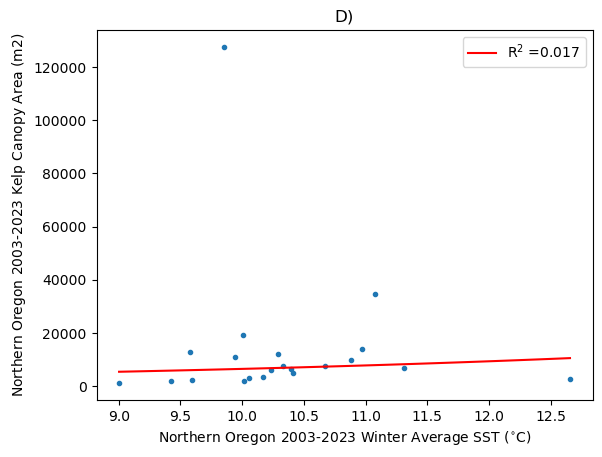

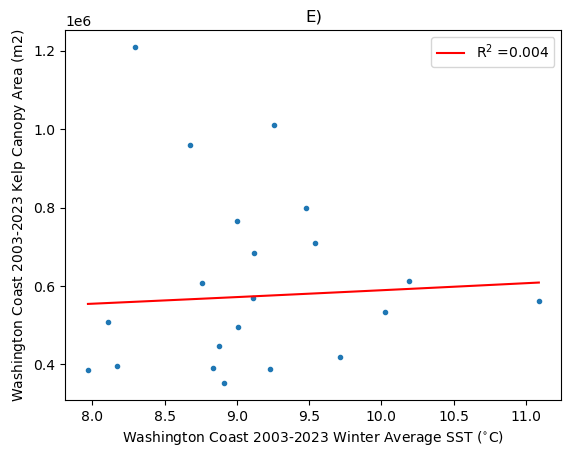

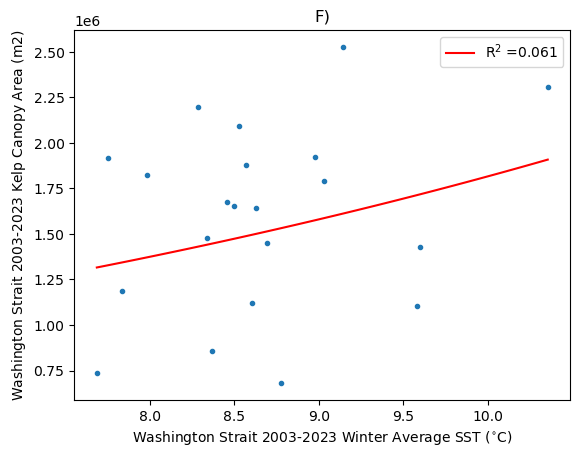

In [8]:
from Models import plotting_model

plotting_model(site_result, all_data)

**Figure 3)** Regression of average winter SST vs fall kelp canopy cover for each site, including data from all years (2003-2023).

### Compute linear regression of average winter SST vs kelp canopy cover for each site before the onset of stressors (2003-2012)

In [9]:
Sonoma_result_prior = stats.linregress(Sonoma_sst['SST'][0:10], np.log(Sonoma_Q3['kelp_area_m2'][0:10]))

Humboldt_result_prior = stats.linregress(Humboldt_sst['SST'][0:10], np.log(Humboldt_Q3['kelp_area_m2'][0:10]))

OR_S_result_prior = stats.linregress(OR_S_sst['SST'][0:10], np.log(OR_S_Q3['kelp_area_m2'][0:10]))

OR_N_result_prior = stats.linregress(OR_N_sst['SST'][0:10], np.log(OR_N_Q3['kelp_area_m2'][0:10]))

WA_coast_result_prior = stats.linregress(WA_coast_sst['SST'][0:10], np.log(WA_coast_Q3['kelp_area_m2'][0:10]))

WA_strait_result_prior = stats.linregress(WA_strait_sst['SST'][0:10], np.log(WA_strait_Q3['kelp_area_m2'][0:10]))

**Print results** - R^2, p-value, and standard error

In [10]:
site_result_prior = [[Sonoma_result_prior,'Sonoma 2003-2012', 'A)'],[Humboldt_result_prior, 'Humboldt 2003-2012', 'B)'], 
                     [OR_S_result_prior, 'Southern Oregon 2003-2012', 'C)'], [OR_N_result_prior, 'Northern Oregon 2003-2012', 'D)'],
                     [WA_coast_result_prior, 'Washington Coast 2003-2012', 'E)'], 
                     [WA_strait_result_prior, 'Washington Strait 2003-2012', 'F)']]

from Models import printing_results

printing_results(site_result_prior)

Sonoma 2003-2012 R^2 = 0.818 p-value = 0.002 Standard error = 0.284
Humboldt 2003-2012 R^2 = 0.225 p-value = 0.994 Standard error = 0.558
Southern Oregon 2003-2012 R^2 = 0.02 p-value = 4.164 Standard error = 0.5
Northern Oregon 2003-2012 R^2 = 0.749 p-value = 0.007 Standard error = 0.304
Washington Coast 2003-2012 R^2 = 0.015 p-value = 4.4 Standard error = 0.23
Washington Strait 2003-2012 R^2 = 0.134 p-value = 1.792 Standard error = 0.206


**Plot results before the onset of stressors**

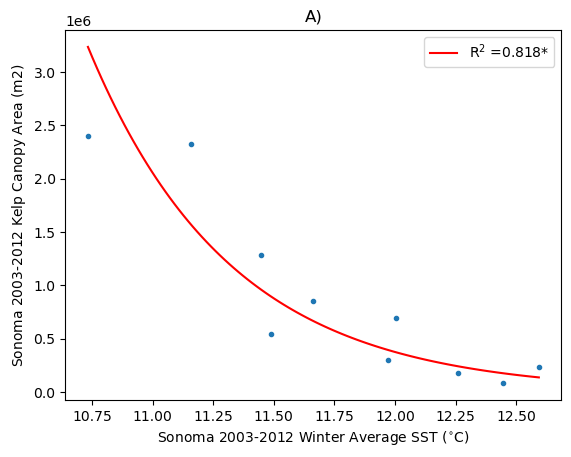

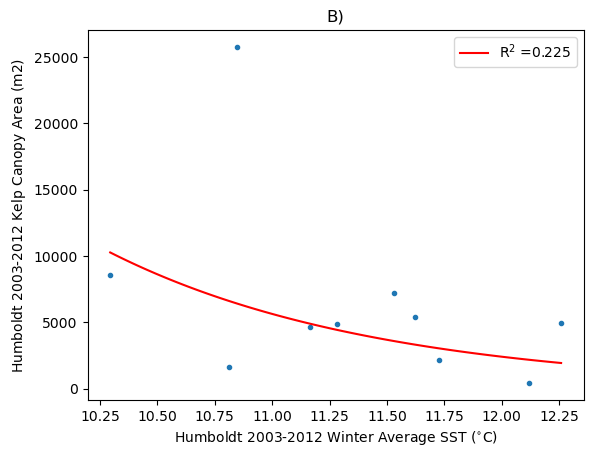

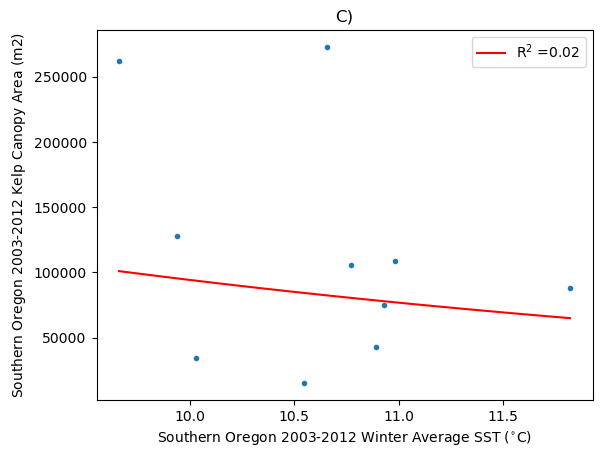

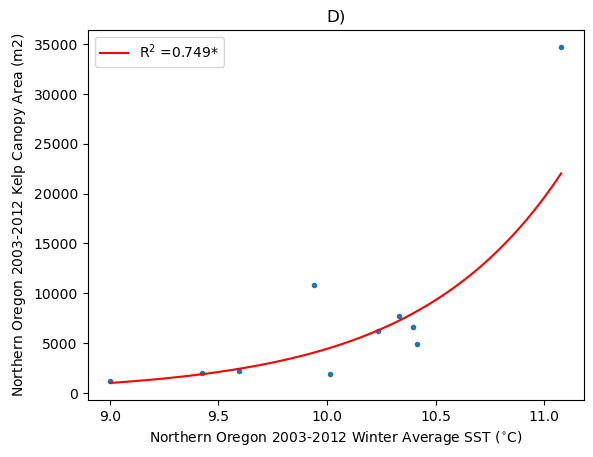

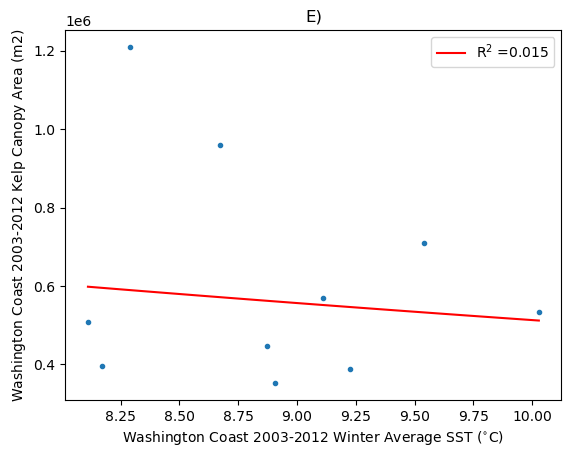

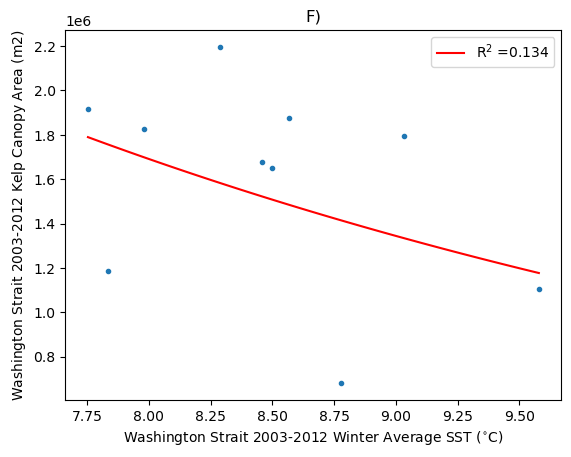

In [11]:
all_data_prior = [[Sonoma_Q3[0:10], Sonoma_sst[0:10],'Sonoma'],[Humboldt_Q3[0:10], Humboldt_sst[0:10], 'Humboldt'], 
                  [OR_S_Q3[0:10], OR_S_sst[0:10], 'Southern Oregon'], [OR_N_Q3[0:10], OR_N_sst[0:10], 'Northern Oregon'], 
                  [WA_coast_Q3[0:10], WA_coast_sst[0:10], 'Washington Coast'], 
                  [WA_strait_Q3[0:10], WA_strait_sst[0:10], 'Washington Strait']]

plotting_model(site_result_prior, all_data_prior)

**Figure 4)** Regression of average winter SST vs fall kelp canopy cover for each site, including data only from years *prior* to the onset of stressors (2003-2012). R$^2$ values with an asterisk represent statistically significant results (p-value < 0.05)

### Compute linear regression of average winter SST vs kelp canopy cover for each site after the onset of stressors (2013-2023)

In [12]:
Sonoma_result_after = stats.linregress(Sonoma_sst['SST'][11:20], np.log(Sonoma_Q3['kelp_area_m2'][11:20]))

Humboldt_result_after = stats.linregress(Humboldt_sst['SST'][11:20], np.log(Humboldt_Q3['kelp_area_m2'][11:20]))

OR_S_result_after = stats.linregress(OR_S_sst['SST'][11:20], np.log(OR_S_Q3['kelp_area_m2'][11:20]))

OR_N_result_after = stats.linregress(OR_N_sst['SST'][11:20], np.log(OR_N_Q3['kelp_area_m2'][11:20]))

WA_coast_result_after = stats.linregress(WA_coast_sst['SST'][11:20], np.log(WA_coast_Q3['kelp_area_m2'][11:20]))

WA_strait_result_after = stats.linregress(WA_strait_sst['SST'][11:20], np.log(WA_strait_Q3['kelp_area_m2'][11:20]))

**Print results** - R^2, p-value, and standard error

In [13]:
site_result_after = [[Sonoma_result_after,'Sonoma 2013-2023', 'A)'],[Humboldt_result_after, 'Humboldt 2013-2023', 'B)'], 
                     [OR_S_result_after, 'Southern Oregon 2013-2023', 'C)'], [OR_N_result_after, 'Northern Oregon 2013-2023', 'D)'],
                     [WA_coast_result_after, 'Washington Coast 2013-2023', 'E)'], 
                     [WA_strait_result_after, 'Washington Strait 2013-2023', 'F)']]

from Models import printing_results

printing_results(site_result_after)

Sonoma 2013-2023 R^2 = 0.225 p-value = 1.186 Standard error = 0.437
Humboldt 2013-2023 R^2 = 0.215 p-value = 1.249 Standard error = 0.376
Southern Oregon 2013-2023 R^2 = 0.031 p-value = 3.907 Standard error = 0.248
Northern Oregon 2013-2023 R^2 = 0.33 p-value = 0.636 Standard error = 0.231
Washington Coast 2013-2023 R^2 = 0.038 p-value = 3.681 Standard error = 0.145
Washington Strait 2013-2023 R^2 = 0.457 p-value = 0.274 Standard error = 0.155


**Plot results after the onset of stressors**

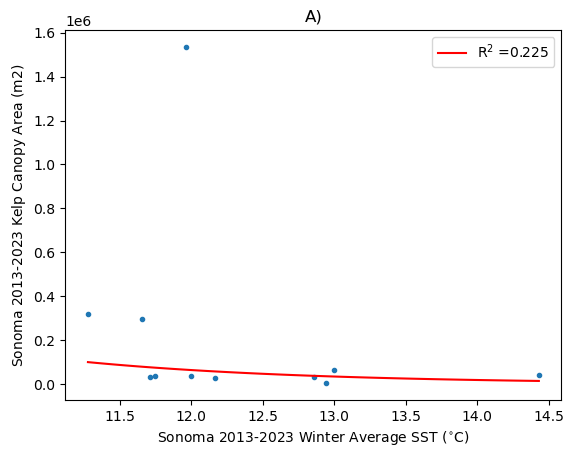

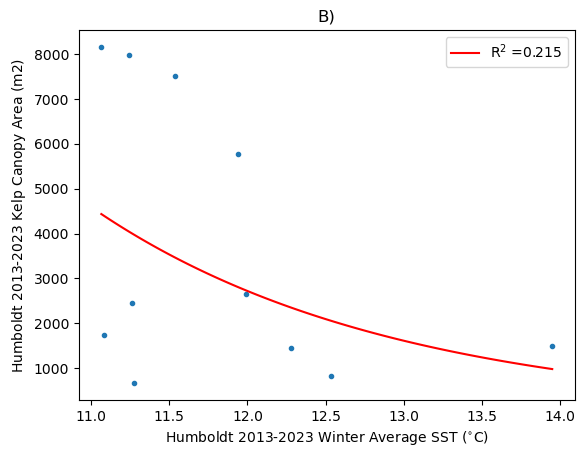

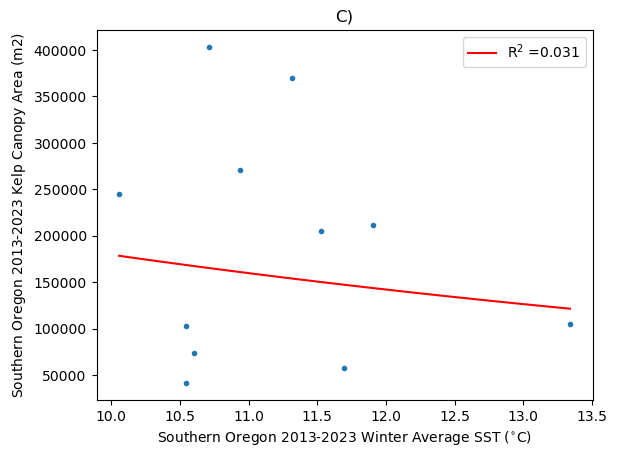

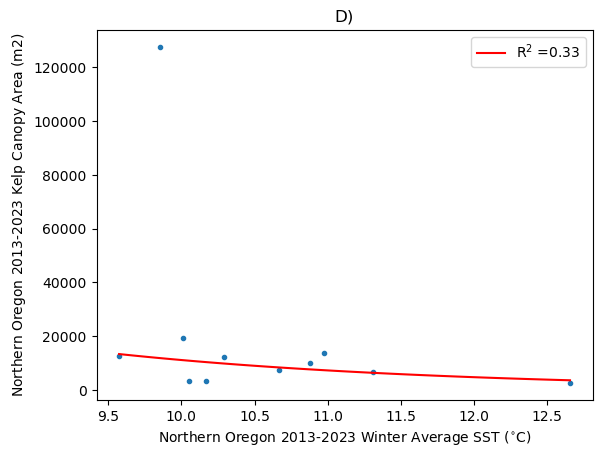

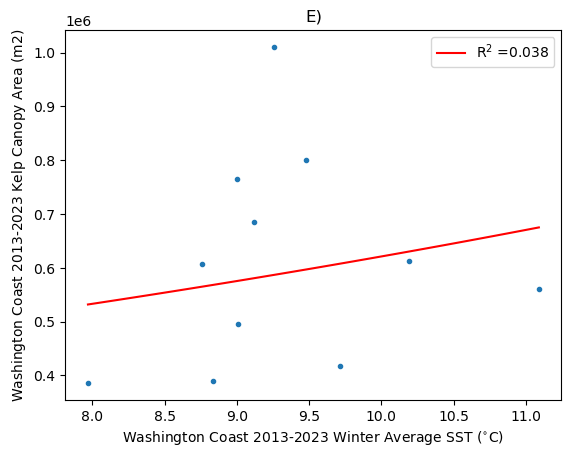

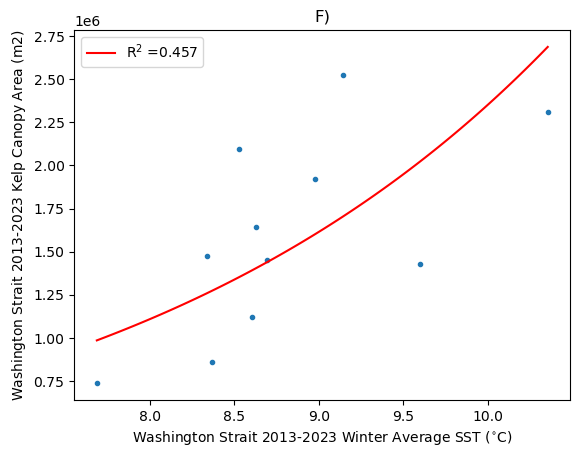

In [14]:
all_data_after = [[Sonoma_Q3[10:], Sonoma_sst[10:],'Sonoma'],[Humboldt_Q3[10:], Humboldt_sst[10:], 'Humboldt'], 
                  [OR_S_Q3[10:], OR_S_sst[10:], 'Southern Oregon'], [OR_N_Q3[10:], OR_N_sst[10:], 'Northern Oregon'], 
                  [WA_coast_Q3[10:], WA_coast_sst[10:], 'Washington Coast'], 
                  [WA_strait_Q3[10:], WA_strait_sst[10:], 'Washington Strait']]

plotting_model(site_result_after, all_data_after)

**Figure 5)** Regression of average winter SST vs fall kelp canopy cover for each site, including data only from years *after* the onset of stressors (2013-2023). R$^2$ values with an asterisk represent statistically significant results (p-value < 0.05)

***Principal Component Analysis (PCA)***

To analyze how sites correlate with each other, a PCA was ran using quarter three kelp canopy area during two time periods: 2003-2023, and 1984-2023. Because sites are not all the same size, values were first standardized by calculating z-scores. After a matrix was created containing the standardized z-scores, eigenvalues and eigenvectors were extracted. These values were used to determine the percentage of variance accounted for by the first two principal components (PCs), and to compute and plot the factor loadings. 

### Calculate how sites correlate with each other using a Principal Component Analysis (PCA) from 2002-2023

**Standardize kelp canopy area at each site by calculating z-scores**

In [15]:
Sonoma_z = (Sonoma_Q3['kelp_area_m2'] - (np.mean(Sonoma_Q3['kelp_area_m2'])))/np.std(Sonoma_Q3['kelp_area_m2'], ddof=1)
Humboldt_z = (Humboldt_Q3['kelp_area_m2'] - (np.mean(Humboldt_Q3['kelp_area_m2'])))/np.std(Humboldt_Q3['kelp_area_m2'], ddof=1)
OR_S_z = (OR_S_Q3['kelp_area_m2'] - (np.mean(OR_S_Q3['kelp_area_m2'])))/np.std(OR_S_Q3['kelp_area_m2'], ddof=1)
OR_N_z = (OR_N_Q3['kelp_area_m2'] - (np.mean(OR_N_Q3['kelp_area_m2'])))/np.std(OR_N_Q3['kelp_area_m2'], ddof=1)
WA_coast_z = (WA_coast_Q3['kelp_area_m2'] - (np.mean(WA_coast_Q3['kelp_area_m2'])))/np.std(WA_coast_Q3['kelp_area_m2'], ddof=1)
WA_strait_z = (WA_strait_Q3['kelp_area_m2'] - (np.mean(WA_strait_Q3['kelp_area_m2'])))/np.std(WA_strait_Q3['kelp_area_m2'], ddof=1)

**Create a data matrix containing the staradized z-scores for kelp canopy area**

In [16]:
N = len(Sonoma_Q3['kelp_area_m2'])
k = 6 # number of input variables

Xz = np.ones([N, k])
Xz[:, 0] = Sonoma_z
Xz[:, 1] = Humboldt_z
Xz[:, 2] = OR_S_z
Xz[:, 3] = OR_N_z
Xz[:, 4] = WA_coast_z
Xz[:, 5] = WA_strait_z

**Extract the eigenvalues and eigenvectors of the correlation matrix.**

In [17]:
R = np.cov(Xz, rowvar=False)
np.shape(R)

values, vectors = linalg.eig(R)
values = np.real(values) 
print('Eigenvalues:', values)
print('Eigenvectors:', vectors)

Eigenvalues: [1.67954601 1.52910624 0.3710293  0.56629485 0.83327192 1.02075167]
Eigenvectors: [[ 0.1878203   0.60294689  0.17172171 -0.62880263  0.39970933  0.12856882]
 [-0.30253402  0.52694941  0.03002483  0.67218911  0.29468013  0.30202884]
 [ 0.46202832  0.22524396  0.46453509  0.3201598  -0.0454682  -0.64454053]
 [-0.20473575 -0.49387999  0.30384933  0.00959451  0.77407247 -0.15020379]
 [ 0.64688949 -0.07997026 -0.62807926  0.19390683  0.37449555  0.05299453]
 [ 0.44647934 -0.24027451  0.51672947  0.11213762 -0.10905789  0.67189772]]


**Sort the eigenvalues and eigenvectors so that they are arranged in order of decreasing variance (PC1 first, PC2 second, etc.)**

In [18]:
val_indices = np.flip(np.argsort(values))

values = values[val_indices]
vectors = vectors[:, val_indices]

print(values)
print(vectors)

[1.67954601 1.52910624 1.02075167 0.83327192 0.56629485 0.3710293 ]
[[ 0.1878203   0.60294689  0.12856882  0.39970933 -0.62880263  0.17172171]
 [-0.30253402  0.52694941  0.30202884  0.29468013  0.67218911  0.03002483]
 [ 0.46202832  0.22524396 -0.64454053 -0.0454682   0.3201598   0.46453509]
 [-0.20473575 -0.49387999 -0.15020379  0.77407247  0.00959451  0.30384933]
 [ 0.64688949 -0.07997026  0.05299453  0.37449555  0.19390683 -0.62807926]
 [ 0.44647934 -0.24027451  0.67189772 -0.10905789  0.11213762  0.51672947]]


**Determine the percentage of variance accounted for by the first two principal components (PCs).**

In [19]:
percent_variance = values/np.sum(values)*100
print(percent_variance)

print('Percentage of variance accounted for by PC1:', round(percent_variance[0], ndigits=3))
print('Percentage of variance accounted for by PC2:', round(percent_variance[1], ndigits=3))

[27.99243352 25.48510405 17.0125279  13.8878654   9.43824753  6.18382159]
Percentage of variance accounted for by PC1: 27.992
Percentage of variance accounted for by PC2: 25.485


**Compute and plot the factor loadings.**

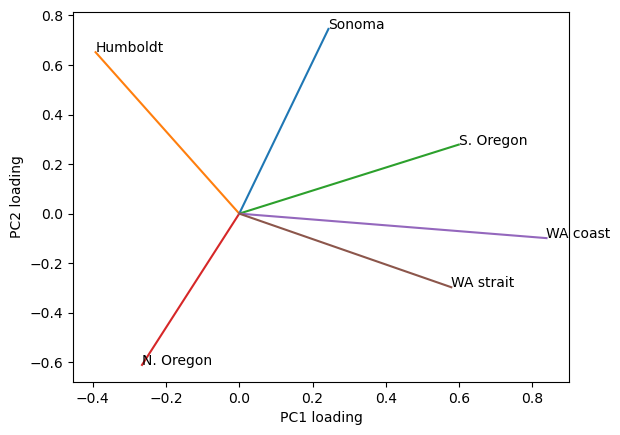

In [20]:
A = vectors@np.diag(values)**0.5

plt.figure()
plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')

variables = ['Sonoma','Humboldt','S. Oregon','N. Oregon','WA coast','WA strait']
for i,txt in enumerate(variables):
    plt.plot([0,A[i,0]],[0,A[i,1]],'-')
    plt.text(A[i,0],A[i,1],txt)

**Figure 6)** Principal component analysis (PCA) using quarter 3 kelp canopy data from 2003-2023, showing how closely sites are correlated with each other. Percentage of variance accounted for by PC1 = 27.992, percentage of variance accounted for by PC2 = 25.485.  All data standardized by z-score. 5

### Calculate how sites correlate with each other using a Principal Component Analysis (PCA) from 1984-2023

**Create a new dataframe with all quarter three data from 1984-present**

In [21]:
Coast_WA_df2 = Coast_WA_df[(Coast_WA_df['quarter'] == 3)]
Strait_WA_df2 = Strait_WA_df[(Strait_WA_df['quarter'] == 3)]
No_Oregon_df2 = No_Oregon_df[(No_Oregon_df['quarter'] == 3)]
So_Oregon_df2 = So_Oregon_df[(So_Oregon_df['quarter'] == 3)]
Humboldt_df2 = Humboldt_df[(Humboldt_df['quarter'] == 3)]
Sonoma_df2 = Sonoma_df[(Sonoma_df['quarter'] == 3)]

**Standardize kelp canopy area at each site by calculating z-scores**

In [22]:
Sonoma_z_all = (Sonoma_df2['kelp_area_m2'] - (np.mean(Sonoma_df2['kelp_area_m2'])))/np.std(Sonoma_df2['kelp_area_m2'], ddof=1)
Humboldt_z_all = (Humboldt_df2['kelp_area_m2'] - (np.mean(Humboldt_df2['kelp_area_m2'])))/np.std(Humboldt_df2['kelp_area_m2'], ddof=1)
OR_S_z_all = (So_Oregon_df2['kelp_area_m2'] - (np.mean(So_Oregon_df2['kelp_area_m2'])))/np.std(So_Oregon_df2['kelp_area_m2'], ddof=1)
OR_N_z_all = (No_Oregon_df2['kelp_area_m2'] - (np.mean(No_Oregon_df2['kelp_area_m2'])))/np.std(No_Oregon_df2['kelp_area_m2'], ddof=1)
WA_coast_z_all = (Coast_WA_df2['kelp_area_m2'] - (np.mean(Coast_WA_df2['kelp_area_m2'])))/np.std(Coast_WA_df2['kelp_area_m2'], ddof=1)
WA_strait_z_all = (Strait_WA_df2['kelp_area_m2'] - (np.mean(Strait_WA_df2['kelp_area_m2'])))/np.std(Strait_WA_df2['kelp_area_m2'], ddof=1)

**Create a data matrix containing the staradized z-scores for kelp canopy area**

In [23]:
N_all = len(Strait_WA_df2['kelp_area_m2'])
k = 6 # number of input variables

Xz2 = np.ones([N_all, k])
Xz2[:, 0] = Sonoma_z_all
Xz2[:, 1] = Humboldt_z_all
Xz2[:, 2] = OR_S_z_all
Xz2[:, 3] = OR_N_z_all
Xz2[:, 4] = WA_coast_z_all
Xz2[:, 5] = WA_strait_z_all

**Extract the eigenvalues and eigenvectors of the correlation matrix.**

In [24]:
R_all = np.cov(Xz2, rowvar=False)
np.shape(R_all)

values_all, vectors_all = linalg.eig(R_all)
values_all = np.real(values_all) 
print('Eigenvalues:', values_all)
print('Eigenvectors:', vectors_all)

Eigenvalues: [1.82649708 1.38763526 1.04438711 0.75747069 0.41318536 0.5708245 ]
Eigenvectors: [[ 0.32658143  0.3459846   0.52763855 -0.64582939 -0.27837309  0.0254874 ]
 [-0.21545    -0.02993752  0.81992507  0.5280245   0.03961339  0.00536959]
 [ 0.5616337   0.27165354  0.005222    0.20698088  0.47247666 -0.58708551]
 [ 0.44837577  0.41147469 -0.15924503  0.47127252 -0.30871843  0.53561545]
 [ 0.39128524 -0.5955847   0.02111813  0.14151115 -0.60006333 -0.33410679]
 [ 0.42112763 -0.53063188  0.15325866 -0.13831217  0.49226206  0.50610366]]


**Sort the eigenvalues and eigenvectors so that they are arranged in order of decreasing variance (PC1 first, PC2 second, etc.)**

In [25]:
val_indices_all = np.flip(np.argsort(values_all))

values_all = values_all[val_indices_all]
vectors_all = vectors_all[:, val_indices_all]

print(values_all)
print(vectors_all)

[1.82649708 1.38763526 1.04438711 0.75747069 0.5708245  0.41318536]
[[ 0.32658143  0.3459846   0.52763855 -0.64582939  0.0254874  -0.27837309]
 [-0.21545    -0.02993752  0.81992507  0.5280245   0.00536959  0.03961339]
 [ 0.5616337   0.27165354  0.005222    0.20698088 -0.58708551  0.47247666]
 [ 0.44837577  0.41147469 -0.15924503  0.47127252  0.53561545 -0.30871843]
 [ 0.39128524 -0.5955847   0.02111813  0.14151115 -0.33410679 -0.60006333]
 [ 0.42112763 -0.53063188  0.15325866 -0.13831217  0.50610366  0.49226206]]


**Determine the percentage of variance accounted for by the first two principal components (PCs).**

In [26]:
percent_variance_all = values_all/np.sum(values_all)*100
print(percent_variance_all)

print('Percentage of variance accounted for by PC1:,', round(percent_variance_all[0], ndigits=3))
print('Percentage of variance accounted for by PC2:,', round(percent_variance_all[1], ndigits=3))

[30.44161793 23.12725434 17.40645181 12.62451158  9.5137417   6.88642264]
Percentage of variance accounted for by PC1:, 30.442
Percentage of variance accounted for by PC2:, 23.127


**Compute and plot the factor loadings.**

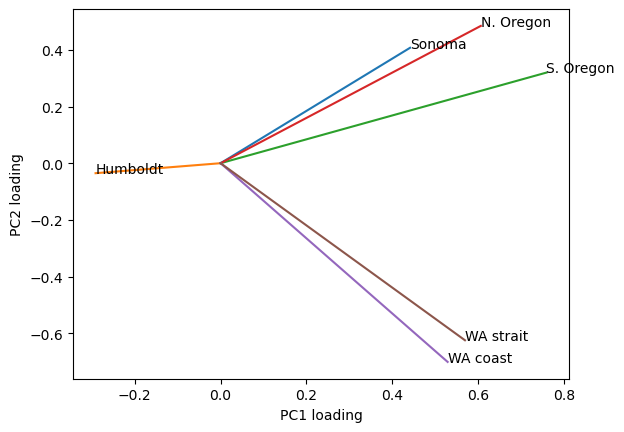

In [27]:
A_all = vectors_all@np.diag(values_all)**0.5

plt.figure()
plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')

variables = ['Sonoma','Humboldt','S. Oregon','N. Oregon','WA coast','WA strait']
for i,txt in enumerate(variables):
    plt.plot([0,A_all[i,0]],[0,A_all[i,1]],'-')
    plt.text(A_all[i,0],A_all[i,1],txt)

**Figure 7)** Principal component analysis (PCA) using quarter 3 kelp canopy data from 1984-2023, showing how closely sites are correlated with each other. Percentage of variance accounted for by PC1 = 30.442, percentage of variance accounted for by PC2 = 23.127. All data standardized by z-score.7

## Results

| Years     |  Sonoma | Humboldt | S. Oregon | N. Oregon | WA Coast | WA Strait |
| --------  | ------- | ---------|-----------|-----------|----------|-----------|
| 2003-2023 |**0.392**| 0.197    | 0.002     |   0.017   |  0.004   |  0.061    |
| 2003-2012 |**0.818**|  0.225   |    0.02   |**0.749**  | 0.015    | 0.134     |
| 2013-2023 | 0.225   |   0.215  |   0.031   |   0.33    |  0.038   |  0.457    |

**Table 2)** All R$^2$ values for all sites. **Bolded values** indicate statistically significant R$^2$ values

### Correlations

Three correlations were computed for each site. One including data from the entire timeseries (2003-2023), one for years prior to the onset of stressors (2003-2012), and one for years after the onset of stressors (2013-2023). Of the 18 correlations, only three resulted in significant relationships. 

***Sonoma-***
In Sonoma, the correlation between average winter SST and fall kelp canopy cover for data in the entire timeseries resulted in an R$^2$ of 0.392 (Table 2). This negative correlation increased to an R$^2$ of 0.818 with data prior to the onset of stressors (2003-2012)(Table 2). Both of these values were statistically significant with a p-value of <0.05. Sonoma data after the onset of stressors (2013-2023) had an insignificant, slightly negative correlation. 

***Humboldt-***
The Humboldt site had statistically insignificant negative correlations for all timeseries, resulting in R$^2$ values of 0.197, 0.225, and 0.215 for the entire dataset, years prior to stressors, and years after stressors respectively (Table 2). 

***Southern Oregon-***
Southern Oregon also had statistically insignificant relationships for all three timeseries. However, data from 2003-2023 had a slightly positive correlation (Figure 3C). 

***Northern Oregon-*** 
Northern Oregon was the only site besides Sonoma with a significant correlation. In the years prior to the onset of stressors, there was a *positive* correlation reulting in an R$^2$ value of 0.749, and a p-value of <0.05 (Figure 4D). The entire dataset had an insigificant positive correlation with an R$^2$ of 0.017, and years after the onset of stressors had an insignificant *negative* correlation with an R$^2$ of 0.33 (Table 2). 

***Washington Coast-***
None of the timeseries on the Washington Coast resulted in a significant correlation. The timeseries including all data and the timeseries after the onset of stressors had slightly positive correlations (Figure 3E, Figure 5E). The timeseries before the onset of stressors had a slightly negative, insignificant relationship (Figure 4E).

***Washington Strait-***
The Washington Strait had slightly stronger correlations than the Washington Coast, but relationships were still insignificant. The strongest correlation was in years after the onset of stressors, with a positive trend and R$^2$ of 0.457 (Figure 5F). All data combined resulted in a weaker, positive correlation. Years prior to the onset of stressors had a weak, *negative* correlation.

### Timeseries

A timeseries was plotted for every site including average winter SST and average fall canopy cover from 2003-present (Figure 2).

***Sonoma-***
The Sonoma site had the second most kelp canopy of all sites with an average of ~540,000 m$^2$ of kelp and a maximum of ~2.4 million m$^2$ of kelp in 2008 (Figure 2A). We can also clearly see the sharp decline of kelp at this site after 2013 due to the onset of stressors listed before (Figure 2A). This site had the most apparent significant relationship with average winter SST and we can clearly see in the timeseries that when SST is low, kelp is high (before the collapse in 2013). The average winter SST's ranged from 10.7 to 14.4 degrees Celsius. Sonoma had the highest average winter SST's.

***Humboldt-***
Humboldt had the lowest historical kelp canopy area with an average of ~5000 m$^2$ of kelp and a maximum of ~26,000 m$^2$ of kelp in 2009 (Figure 2B). There does not appear to be any significant sharp decline in kelp after 2013 and any relationship with winter SST is not clear from the timeseries. The average winter SST's ranged from 10.3 to 14 degrees Celsius. 

***Southern Oregon-***
Southern Oregon had an average of 150,000 m$^2$ of kelp and a maximum of 400,000 m$^2$ of kelp in 2013 (Figure 2C). We can see a sharp decline of kelp canopy at this site after 2013, but the population rebounds in 2017. The average winter SST's ranged from 9.7 to 13.3 degrees Celsius. 

***Northern Oregon-***
Northern Oregon had an interesting timeseries of kelp canopy cover - as kelp canopy area has consistently stayed under ~20,000 m$^2$ for the past two decades, besides a huge spike to ~128,000 m$^2$ in 2023 (Figure 2D). Northern Oregon had an average of ~141,000 m$^2$ of kelp likely because of this huge spike. The average winter SST's ranged from 9 to 12.7 degrees Celsius.

***Washington Coast-***
The Washington Coast had the third highest average kelp canopy during the past two decades with an average ~610,000 m$^2$ of kelp canopy. The maximum canopy area at this site occured in 2012 at ~1.2 million m$^2$ of kelp (Figure 2E). At this site there is a sharp decline in kelp canopy cover in 2013, but the population started to rebound in 2015. The average winter SST's ranged from 8 to 11.1 degrees Celsius.

***Washington Strait-***
The Washington Strait had the highest average kelp canopy area with an average ~1.6 million m$^2$ of kelp. There has consitently been over 1 million m$^2$ of kelp at this site besides in 2010, 2014, and 2022 (Figure 2F). Again, we see a sharp decline in kelp at this site after 2013 but the population was able to rebound and actually reach the highest canopy extent of 2.5 million m$^2$ of kelp in 2019, after the onset of stressors. At this site the average winter SST's ranged from 7.7 to 10.4 degrees Celsius. This site also had the lowest average winter SST's. 

### Principal Component Analysis

**2003-2023**

The first pricipal component analysis used quarter three kelp canopy data from all six sites from 2003-2023. All data were standardized with z-scores. Principal component one (PC1) accounted for ~28% of the variance and principal component two (PC2) accounted for ~25.5% of the variance. With PC1 we see that when kelp is higher in Washington, Southern Oregon, and Sonoma, we would expect kelp to be lower in Humboldt and Northern Oregon (Figure 6). We also see that the two Washington sites are pretty similar with both PC1 and PC2, Humboldt and Sonoma are more closely related using PC2, and Southern Oregon is in between the California and Washington sites. Northern Oregon is the outlier.

**1984-2023**

The second principal component analysis used quarter three kelp canopy data from all six sites from 1984-2023. Again, all data were standardized with z-scores. PC1 accounted for ~30.4% of the variance, and PC2 accounted for ~23.1% of the variance. In this analysis we see that the two Washington sites are very correlated with both PC1 and PC2 (Figure 7). Sonoma, Southern Oregon, and Northern Oregon are also closely correlated. Humboldt is the outlier in this analysis. With PC1 we would expect that when kelp is high in Sonoma, Oregon, and Washington, it would be low in Humboldt. With PC2 we would expect that when kelp is high in Sonoma and Oregon, it is low in Washington, and Humboldt is in between.

## Conclusions

For this project I analyzed the relationship between bull kelp canopy cover during its peak biomass season and average winter sea surface temperature (SST) the preceding winter, at 6 sites across the species range. Two sites were located in Northern California, two sites in Oregon, and two sites in Washington. For each site I focused on three main time periods; 2003-2023, 2003-2012 (prior to the onset of stressors), and 2013-2023 (after the onset of stressors). Based on a previous project, I had predicted that there would be a significant negative correlation between average winter SST and fall kelp canopy at every site, prior to 2013. However, this trend was only apparent and significant at the Sonoma site. In Sonoma, the correlation between winter SST and fall kelp canopy area resulted in an R$^2$ of 0.818, which was twice as much as data from the entire time period (R$^2$ = 0.392). This relationship was clear in the timeseries analysis, where we see high kelp canopy during low winter SST, prior to 2013 (Figure 2A). After the onset of stressors there was no signficant relationship and the R$^2$ reduced to 0.225.

The only other site with a significant correlation was in Northern Oregon for the time period prior to the onset of stressors, with an R$^2$ of 0.749. Unlike my prediction, this correlation was positive, showing that when average winter SST was higher at this site, kelp canopy increased. We can see that the temperature range with maximum canopy area in Northern Oregon was between 10 and 11 degrees celsius, which is similar to the temperature range with maximum canopy area in Sonoma (Figure 4D & 4A). It could be possible that there is a lower thermal tolerance for bull kelp gametophytes, and that when temperatures are too cold (~8-9 degrees celsius) kelp does worse the following summer and fall. A study by Weigel et al., 2023 investigated the effects of temperature and nutrients on microscopic stages of bull kelp in Washington State. In this study they cultured microscopic gametophytes and sporophytes in different temperature and nutrient treatments. Their results found that bull kelp gametophyte densities were highest between 10 and 16 degrees celsius, and sporophyte densities were highest between 10 and 14 degrees celsius. However, this study only used temperature treatments ranging from 10-22 degrees celsius. It would be interesting to explore the lower thermal tolerance of these microscopic stages, especially in areas where winter temperatures reach averages of 8-9 degrees celsius. 

If my speculation is true, it is surprising that I did not find a significant positive correlation at any of the other more northern sites. Both sites in Washington and the site in Southern Oregon did not show any signficant correlations - positive or negative. The closest site was on the Washington Strait which had an R$^2$ of 0.457 for years after the onset of stressors, but the p-value was 0.274. Nutrient availability is also a good predictor for fall kelp canopy cover (Garcia-Reyes et al., 2022; Weigel et al., 2023). It is possible that at most of these sites winter nutrient availability plays an equal, if not more important, role in determining success of the population the following fall. 

As I predicted, I did not see any significant relationship between winter SST and fall kelp canopy cover in the years after the onset of stressors (2013-2023). However, this trend does not hold much value if there were no significant correlations prior to the onset of stressors. It is again likely that nutrients or some other oceanographic factors are driving kelp canopy area in the northern sites. 

The principal component analysis showed more information on how sites correlate with each other. In the first analysis, we saw that the two Washington sites were closely correlated. However, the two Northern California sites were not as correlated as I would have expected. This is likely because the Humboldt site had much less historical kelp area than Sonoma. We also saw in PC1 that the two Oregon sites are not closely correlated. I suspect this could be in part because of the historically low kelp canopy area in Northern Oregon with the large spike in 2023. In the second analysis with data from 1984-2023, we saw that sites in the same state were typically highly correlated with each other. However, Humboldt was the outlier and not closely correlated with Sonoma. I would need to look further into the historical kelp canopy trends at these sites to better understand why Humboldt was so far off. 

Understanding the seasonal drivers of bull kelp canopy can be a valuable tool for kelp conservation and restoration in the future. Following the widespread collapse of kelp after 2013, various restoration strategies have been developed to help return the population to its baseline state. One common method involves placing spore bags at restoration sites to naturally release reproductive material. Because SST could be a key predictor of kelp canopy area, spore bags could be strategically placed in areas identified as cold water "climate refugia" (Garcia-Reyes et al., 2022). In locations where this is not feasible, winter SST could serve as a predictor for the success of restoration projects the following year. 

This study highlights the complex dynamics affecting bull kelp populations at all stages of their life cycle. It is evident that more research is needed on the seasonal drivers and oceanographic conditions impacting bull kelp at the microscopic level, all across the species range. As climate change and human activities continue to exert pressure on marine ecosystems, this knowledge is increasingly crucial for making informed decision to preserve the ecological, economic and cultural importance of kelp forests. 

## Future directions

One of the main takeaways I got from this project is that more research is needed on the minimum thermal tolerance of microscopic bull kelp stages. It is possible that in the northern range winter temperatures could be too cold and negatively impacting the production of adult sporophytes. It is also very possible that these sites are more dependent on other factors, such as nutrients. It would be helpful to get a hold of a historical dataset that has a proxy for nutrients, such as the upwelling index used in Garcia-Reyes et al. (2022), and see how that impacts my results. Weigel et al. (2023) also discussed bull kelp loss in Washington being correlated with increased *summer* SST's. If I were to do this analysis again it would be helpful to look at other seasonal SST averages and see if sites in the northern range are better predicted by different seasons. 

## References

Arafeh-Dalmau, N., Montaño-Moctezuma, G., Martínez, J. A., Beas-Luna, R., Schoeman, D. S., & 
Torres-Moye, G. (2019). Extreme Marine Heatwaves Alter Kelp Forest Community Near Its Equatorward Distribution Limit. Frontiers in Marine Science, 6, 499. https://doi.org/10.3389/fmars.2019.00499

Bell, T. W., Allen, J. G., Cavanaugh, K. C., & Siegel, D. A. (2020). Three decades of variability in 
California’s giant kelp forests from the Landsat satellites. Remote Sensing of Environment, 238, 110811. https://doi.org/10.1016/j.rse.2018.06.039 

Cavanaugh, K., Siegel, D., Reed, D., & Dennison, P. (2011). Environmental controls of giant-kelp 
biomass in the Santa Barbara Channel, California. Marine Ecology Progress Series, 429, 1–17. https://doi.org/10.3354/meps09141 

Filbee-Dexter, K., & Scheibling, R. (2014). Sea urchin barrens as alternative stable states of collapsed 
kelp ecosystems. Marine Ecology Progress Series, 495, 1–25. https://doi.org/10.3354/meps10573 

García-Reyes, M., Thompson, S. A., Rogers-Bennett, L., & Sydeman, W. J. (2022). Winter oceanographic 
conditions predict summer bull kelp canopy cover in northern California. PLOS ONE, 17(5), e0267737. https://doi.org/10.1371/journal.pone.0267737 

Harvell, C. D., Montecino-Latorre, D., Caldwell, J. M., Burt, J. M., Bosley, K., Keller, A., Heron, S. F., 
Salomon, A. K., Lee, L., Pontier, O., Pattengill-Semmens, C., & Gaydos, J. K. (2019). Disease epidemic and a marine heat wave are associated with the continental-scale collapse of a pivotal predator ( Pycnopodia helianthoides ). Science Advances, 5(1), eaau7042. https://doi.org/10.1126/sciadv.aau7042  

Kelpwatch.org. (n.d.). https://kelpwatch.org/ 

McPherson, M. L., Finger, D. J. I., Houskeeper, H. F., Bell, T. W., Carr, M. H., Rogers-Bennett, L., & 
Kudela, R. M. (2021). Large-scale shift in the structure of a kelp forest ecosystem co-occurs with an epizootic and marine heatwave. Communications Biology, 4(1), 298. https://doi.org/10.1038/s42003-021-01827-6 

NASA. (2021, December 9). Cloud datasets. NASA. https://podaac.jpl.nasa.gov/cloud-
datasets?ids=Keywords&amp;values=Oceans%3AOcean+Temperature  

Rogers-Bennett, L., & Catton, C. A. (2019). Marine heat wave and multiple stressors tip bull kelp forest 
to sea urchin barrens. Scientific Reports, 9(1), 15050. https://doi.org/10.1038/s41598-019-51114-y 

Saccomanno, V. R., Bell, T., Pawlak, C., Stanley, C. K., Cavanaugh, K. C., Hohman, R., Klausmeyer, K. 
R., Cavanaugh, K., Nickels, A., Hewerdine, W., Garza, C., Fleener, G., & Gleason, M. (2023). Using unoccupied aerial vehicles to map and monitor changes in emergent kelp canopy after an ecological regime shift. Remote Sensing in Ecology and Conservation, 9(1), 62–75. https://doi.org/10.1002/rse2.295 

Springer, Y. P., Hays, C. G., Carr, M. H., & Mackey, M. R. (2010). Toward Ecosystem-Based 
Management of Marine Macroalgae—The Bull Kelp, Nereocystis Luetkeana. Oceanography and Marine Biology: An Annual Review, 48, 1-42

Ulaski, B. P., & Konar, B. (2021). Direct release of embryonic sporophytes from adult Nereocystis 
luetkeana (Laminariales, Ochrophyta) in a high latitude estuary. Algae, 36(2), 147–154. https://doi.org/10.4490/algae.2021.36.5.10 

Weigel, B. L., Small, S. L., Berry, H. D., & Dethier, M. N. (2023). Effects of temperature and nutrients on 
microscopic stages of the bull kelp ( Nereocystis luetkeana , Phaeophyceae). Journal of Phycology, 59(5), 893–907. https://doi.org/10.1111/jpy.13366 
